<a href="https://colab.research.google.com/github/yodaboop/Capstone-Project/blob/main/Supervisor_Agent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# ---------------------------------------------------
# 1. SETUP AND DEPENDENCIES
# ---------------------------------------------------
!pip install -q langgraph langchain langchain-google-genai langchain-community nest_asyncio
!sudo apt-get -y -qq update > /dev/null 2>&1
!sudo apt-get -y -qq install postgresql > /dev/null 2>&1
!sudo service postgresql start

import os
import functools
import google.generativeai as genai
from google.colab import userdata
from google.colab import drive
from typing import TypedDict, Annotated, List, Union
from langgraph.graph import StateGraph, END
from langchain_core.messages import AnyMessage, SystemMessage, HumanMessage, ToolMessage, AIMessage
import operator
import nest_asyncio

# Configure Gemini
GOOGLE_API_KEY = userdata.get('GEMINI_API_KEY')
genai.configure(api_key=GOOGLE_API_KEY)
# We use LangChain's wrapper for the Router
from langchain_google_genai import ChatGoogleGenerativeAI
model = ChatGoogleGenerativeAI(model="gemini-flash-latest", google_api_key=GOOGLE_API_KEY)

nest_asyncio.apply()

 * Starting PostgreSQL 14 database server
   ...done.


In [ ]:
# ---------------------------------------------------
# 2. MOUNT DRIVE & IMPORT AGENTS
# ---------------------------------------------------
drive.mount('/content/drive')

# UPDATE THESE PATHS to match your actual Drive folder structure
current_dir = os.getcwd()
mdm_agent_path = "/content/drive/Shareddrives/118S Group Project/Capstone Project/Dev/MDM_Agent.ipynb"
identity_agent_path = "/content/drive/Shareddrives/118S Group Project/Capstone Project/Dev/Identity_Agent_1.ipynb"
rag_agent_path = "/content/drive/Shareddrives/118S Group Project/Capstone Project/Dev/Capstone_RAG_agent.ipynb"
escalation_agent_path = "//content/drive/Shareddrives/118S Group Project/Capstone Project/Dev/Escalation_Agent.ipynb"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 1. Import RAG Agent
# Assumption: This notebook exposes a variable named 'rag_chain'
%run "{rag_agent_path}"
print("✅ Knowledge Agent (RAG) Loaded")
print("---------------------------------------------------------------")

# 2. Import MDM Agent
# Assumption: This notebook exposes a variable named 'mdm_graph' (the compiled LangGraph)
# and starts the necessary Toolbox server in the background.
%run "{mdm_agent_path}"
print("✅ MDM Agent Loaded")
print("---------------------------------------------------------------")

# 3. Import Identity Agent
# Assumption: This notebook exposes a variable named 'identity_graph'
%run "{identity_agent_path}"
print("✅ Identity Agent Loaded")
print("---------------------------------------------------------------")

# 3. Import Escalation Agent
%run "{escalation_agent_path}"
print("✅ Escalation Agent Loaded")

✅ OPENAI_API_KEY loaded from Colab secrets.

Please upload the PDF file you want to use for RAG.


Saving NexusTech Employee Guide.pdf to NexusTech Employee Guide (8).pdf

✅ SUCCESS: File 'NexusTech Employee Guide (8).pdf' uploaded and ready for processing.
✅ Loaded 3 page(s) from NexusTech Employee Guide (8).pdf.
✅ Created 7 chunks.
✅ LangChain RAG chain initialized (OpenAI + FAISS).

QUESTION: What is the password for the Nexus-Employees Wi-Fi?
ANSWER:
 The password for the Nexus-Employees Wi-Fi is SecureNet#2025.

QUESTION: Where is the main IT Support Desk located?
ANSWER:
 The main IT Support Desk is located on the Second Floor, in Room S-01, next to the elevators.

QUESTION: Summarize the main onboarding steps for new employees.
ANSWER:
 The main onboarding steps for new employees are as follows:

1. **Check-in**: New employees must check in with Human Resources on the Ground Floor to receive their ID badge and access card.
2. **Complete Initial Paperwork**: All initial paperwork must be completed within the first five business days.
3. **Pick Up IT Equipment**: Pre-configured

/tmp/ipython-input-1440859839.py:85: LangGraphDeprecatedSinceV10: create_react_agent has been moved to `langchain.agents`. Please update your import to `from langchain.agents import create_agent`. Deprecated in LangGraph V1.0 to be removed in V2.0.
  agent = create_react_agent(model, tools, checkpointer=MemorySaver())


🤖 Agent: [{'type': 'text', 'text': "I can help with that. What is the serial number of Agent Smith's device?", 'extras': {'signature': 'CrUFAXLI2nwW3gBzhczkaveRvgiNPpb4MrP3jHqC3in1T2ZbuKTdsmpTm9Q1u7PKcj7GEsKzKPc4Yhk0Osc4BlWxwScvP0DEDhFhAO4X+eWfpdzDgxJQU9LyeEJhImS/BsflVFcaFMcLNM/cQeiLvB72+hPR+F7SP3Ird++58blD0uQ8nuE1fKY6K494UA28nnXwfd3oOOy5lC/ONmmtTRXurQyhvFsDHFOH+Cjy4k5bnTvXiecs4rdgDAVkZ3XX6ZYNCqHY4jRkjl1OvDq267Qt3faz4G+OiconVZzb6ZUVeIBq0+L7wZQvVl/fAD445uNMTumvjrJAePHiJYjhlJeUGvH3ieVGnn7te+DG6RjA/MN8kCkgGWY79ce50Xk2nf20T31l/NVUkrygzaAQr6Pb4jUw5iMx58hkREUS4ee39+KI1w7HLifQ1XUE8FSLfAFID7kl03Cklc7tNarCMkLTPh72VwB/Pg+s4c33Eu/uq9P/iinOKSnN0Q/OfRHUe4e/SGDSFf1usCd1eyym3zIkVRzFBCmL0D+1xwtYybcvq/QPZp+y55XKH/e0GEbUUGoE4S40HpMzj5Ky4NIX9kBs9Tv2TL3/hcfbLGrSv5iQdLXXcMX9NNsMAX6NbFHKw4JM5Dm4uTTpqOccsdRzNfHmT65YCdI0M/wjhxWcHzK7Y1MnjyIKb/PLdL9RXKE7xhUxx55SyXWvX4DucvQHUxUayyHW++WV0e8mDXoNrgLC+JKUK9wpEv7+lHBWbc/DjHGa/p6Qil9D/gEjK5d6HdrpZ7P9CSbEta/tk3OH+BJN1EQG8jIXIVKBqhH8/2/WSkVCujMTwUbXbVCJazIQhtl12TRDR8IC

/tmp/ipython-input-4036236172.py:67: LangGraphDeprecatedSinceV10: create_react_agent has been moved to `langchain.agents`. Please update your import to `from langchain.agents import create_agent`. Deprecated in LangGraph V1.0 to be removed in V2.0.
  agent = create_react_agent(model, tools, checkpointer=MemorySaver())



--- IDENTITY AGENT ONLINE ---

🔹 User: I am neo. My password is redpill. What licenses do I have?
🤖 Agent: OK. neo, user ID 1, you have an active license for Matrix Simulator, Enterprise tier.

----------------------------------------
🔹 User: I need access to the 'Kung Fu Module'. Can you grant it to me?
🤖 Agent: I can help with that. First, I need your username and password to authenticate you.

----------------------------------------
🔹 User: I am smith. My password is wrongpass. What licenses do I have?
🤖 Agent: Authentication failed. Please check your username and password. I cannot proceed without successful authentication.

----------------------------------------
Server stopped.
✅ Identity Agent Loaded
---------------------------------------------------------------
✅ Escalation Agent (Ticket Creator) Ready.

--- Testing Escalation Agent Locally ---
✅ Support Ticket Created Successfully.\n🎫 **Ticket ID:** INC-1528\n📝 **Summary:** My VPN is totally broken and I need help now....\

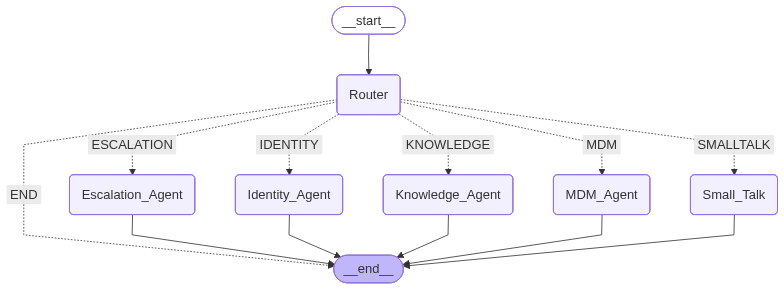


--- STARTING TEST BATCH ---


👤 USER: Hello, are you online?
[Router] Thinking on: Hello, are you online?
[Router] Decision: SMALLTALK
🤖 AGENT: _GREETING: Hello! Yes, I am online and happy to help you today.

To assist you best, I can help with a few specific areas:

1. **Device Setup (MDM):** Enrolling or managing your work devices.
2. **User Licenses (Identity):** Managing software licenses or access rights.
3. **General Questions (Knowledge Base):** Finding answers to common IT issues.
4. **Escalate to a Human:** If your issue is urgent or complex.

What can I assist you with today?

👤 USER: What is the wifi password for the office?
[Router] Thinking on: What is the wifi password for the office?
[Router] Decision: KNOWLEDGE
🤖 AGENT: I don't know based on the document. I will transfer the conversation to a human agent to help you.

👤 USER: I need to onboard Agent Smith (smith@matrix.com).
[Router] Thinking on: I need to onboard Agent Smith (smith@matrix.com).
[Router] Decision: IDEN

In [ ]:
# ---------------------------------------------------
# 3. DEFINE WRAPPER NODES
# ---------------------------------------------------

# Helper for LangGraph Agents (MDM & Identity)
def agent_node_wrapper(state, agent_graph, name):
    """
    Wraps a LangGraph agent to work inside the Router graph.
    """
    # Invoke the agent with the current state
    result = agent_graph.invoke(state)

    # Extract the last message from the agent's response
    last_message = result['messages'][-1]

    return {
        "messages": [last_message]
    }

# Helper for RAG Chain (Knowledge)
def rag_node_wrapper(state, chain, name):
    """
    Wraps a standard LangChain Runnable (RAG) to work inside the Router graph.
    """
    # Get the last human message
    last_human_msg = state["messages"][-1].content

    # Invoke the chain (expects string input)
    response_text = chain.invoke(last_human_msg)

    return {
        "messages": [AIMessage(content=response_text)]
    }

# Create partials for the graph nodes
# Note: Ensure 'mdm_graph', 'identity_graph', and 'rag_chain' are available from the %run imports
mdm_node = functools.partial(agent_node_wrapper,agent_graph=mdm_graph, name="MDM_Agent")
identity_node = functools.partial(agent_node_wrapper,agent_graph=identity_graph, name="Identity_Agent")
rag_node = functools.partial(rag_node_wrapper, chain=rag_chain, name="Knowledge_Agent")
escalation_node = functools.partial(agent_node_wrapper,agent_graph=escalation_graph, name="Escalation_Agent")

# ---------------------------------------------------
# 4. ROUTER AGENT DEFINITION
# ---------------------------------------------------

class RouterAgent(TypedDict):
    messages: Annotated[list[AnyMessage], operator.add]

class RouterAgent:
    def __init__(self, model, system_prompt, smalltalk_prompt, debug=False):
        self.system_prompt = system_prompt
        self.smalltalk_prompt = smalltalk_prompt
        self.model = model
        self.debug = debug

        # Build the Graph
        router_graph = StateGraph(RouterAgentState)

        # Add Nodes
        router_graph.add_node("Router", self.call_llm)
        router_graph.add_node("MDM_Agent", mdm_node)
        router_graph.add_node("Identity_Agent", identity_node)
        router_graph.add_node("Knowledge_Agent", rag_node)
        router_graph.add_node("Escalation_Agent", escalation_node)
        router_graph.add_node("Small_Talk", self.respond_smalltalk)

        # Add Routing Logic
        router_graph.add_conditional_edges(
            "Router",
            self.find_route,
            {
                "MDM": "MDM_Agent",
                "IDENTITY": "Identity_Agent",
                "KNOWLEDGE": "Knowledge_Agent",
                "ESCALATION": "Escalation_Agent",
                "SMALLTALK": "Small_Talk",
                "END": END
            }
        )

        # Agents return to END (Single turn execution)
        router_graph.add_edge("MDM_Agent", END)
        router_graph.add_edge("Identity_Agent", END)
        router_graph.add_edge("Knowledge_Agent", END)
        router_graph.add_edge("Escalation_Agent", END)
        router_graph.add_edge("Small_Talk", END)

        router_graph.set_entry_point("Router")
        self.router_graph = router_graph.compile()

    def call_llm(self, state: RouterAgentState):
        messages = state["messages"]
        if self.debug:
            print(f"[Router] Thinking on: {messages[-1].content}")

        # Prepend System Prompt for classification
        prompt_messages = [SystemMessage(content=self.system_prompt)] + messages
        result = self.model.invoke(prompt_messages)

        if self.debug:
            print(f"[Router] Decision: {result.content}")

        return {"messages": [result]}

    def respond_smalltalk(self, state: RouterAgentState):
        messages = state["messages"]
        prompt_messages = [SystemMessage(content=self.smalltalk_prompt)] + messages
        result = self.model.invoke(prompt_messages)
        return {"messages": [result]}

    def find_route(self, state: RouterAgentState):
        last_message = state["messages"][-1]
        destination = last_message.content.strip().upper()

        # Sanitize output
        valid_routes = ["MDM", "IDENTITY", "KNOWLEDGE", "ESCALATION", "SMALLTALK"]
        if destination not in valid_routes:
            # Fallback logic could go here (e.g., default to KNOWLEDGE or END)
            if self.debug: print(f"[Router] Invalid route '{destination}', defaulting to END")
            return "END"

        return destination

# ---------------------------------------------------
# 5. INITIALIZE AND RUN
# ---------------------------------------------------

# Define the Supervisor Prompt (Updated with ESCALATION)
router_system_prompt = """
You are a Supervisor Agent routing user requests to specialized IT support agents.
Analyze the user's input and select the best agent. Output ONLY one word.

OPTIONS:
MDM: For mobile device management. Keywords: laptop, device, serial number, wipe, setup, provision hardware.
IDENTITY: For user accounts and licenses. Keywords: password, login, Adobe, license, access, username, grant.
KNOWLEDGE: For general policy questions or troubleshooting. Keywords: wifi password, office location, how to, guide, policy.
ESCALATION: Use this if the user asks for a human, seems frustrated, or wants to file a complaint. Keywords: human, specialist, manager, talk to someone, broken, error, ticket.
SMALLTALK: For greetings, goodbyes, or non-IT questions.

Example:
User: "Wipe my laptop" -> MDM
User: "I need an Adobe license" -> IDENTITY
User: "What is the wifi password?" -> KNOWLEDGE
User: "I want to speak to a human immediately" -> ESCALATION
User: "Hi there" -> SMALLTALK
"""

smalltalk_prompt = """
You are a helpful IT Support Assistant. Respond politely to greetings.
Inform the user you can help with Device Setup (MDM), User Licenses (Identity), General Questions (Knowledge Base), or Escalate to a Human.
"""

# Instantiate Router
router = RouterAgent(
    model,
    router_system_prompt,
    smalltalk_prompt,
    debug=True
)

# Visualize
from IPython.display import Image
try:
    display(Image(router.router_graph.get_graph().draw_mermaid_png()))
except:
    print("Graph visualization skipped")

# ---------------------------------------------------
# 6. TEST CONVERSATION
# ---------------------------------------------------
import uuid

config = {"configurable": {"thread_id": str(uuid.uuid4())}}

test_inputs = [
    "Hello, are you online?",                                   # -> SMALLTALK
    "What is the wifi password for the office?",                # -> KNOWLEDGE
    "I need to onboard Agent Smith (smith@matrix.com).",        # -> MDM
    "Please grant an Adobe license to Neo.",                    # -> IDENTITY
    "This AI is useless! I want to talk to a manager now!",     # -> ESCALATION
    "Wipe the laptop with serial number SN-1234."               # -> MDM
]

print("\n--- STARTING TEST BATCH ---\n")

for user_input in test_inputs:
    print(f"\n👤 USER: {user_input}")

    # Run the graph
    inputs = {"messages": [HumanMessage(content=user_input)]}
    result = router.router_graph.invoke(inputs, config=config)

    # Print Final Response
    final_response = result['messages'][-1].content
    print(f"🤖 AGENT: {final_response}")